## Исследование данных о российском кинопрокате



### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
try:
    data_1 = pd.read_csv('/datasets/mkrf_movies.csv')
    data_1.info()
except:
    print('alarm, волк унес зайчат')
data_1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [2]:
try:
    data_2 = pd.read_csv('/datasets/mkrf_shows.csv')
    data_2.info()
except:
    print('alarm, волк унес зайчат')
data_2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [3]:

data_2['puNumber'] = data_2['puNumber'].astype('str')
data_2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null object
box_office    3158 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [4]:

df = data_1.merge(data_2, on='puNumber', how='left')
df.head()
df.info()
df.shape
df['type'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Выгрузили данные `data_1`, `data_2` и объединили их в датафрейм `df`, объединив по столбцу `puNumber` , для этого в `data_2` поменяли тип данныых в столбце `puNumber` с `int` na `str`.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [5]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Изменим тип данных в столбцах `show_start_date` на дататайм и столбец `ratings` на числовое, за одно приведем столбец к удобному виду.

In [6]:
def rating(cat):
    try:
        if cat.find('%') >= 0:
            return float(cat.strip('%'))
    except:
        pass
    return float(cat) * 10
df['ratings'] = df['ratings'].apply(rating)
df['ratings'] = df['ratings'].astype('float')
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%f%z')
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,72.0,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,66.0,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN


#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [7]:
df.isna().sum()
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (100 * report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
refundable_support,7154,95.57
nonrefundable_support,7154,95.57
budget,7154,95.57
financing_source,7154,95.57
box_office,4328,57.81
genres,976,13.04
ratings,967,12.92
producer,568,7.59
film_studio,18,0.24
director,9,0.12


Пропуски в столбцах `financing_source` `nonrefundable_support` `budget` `financing_source` имеются потому что данные в этих столбцах отображают помощь в финансировании фильма.
Заполнять пропуски не будем, поскольку они могут искозить результаты исследований.


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [8]:
df[['title', 'show_start_date']].duplicated().sum()

8

Дропаем дубликаты

In [9]:
duplicated = df[['title', 'show_start_date']].duplicated()
df = df.drop(duplicated[lambda x: x].index, axis=0, errors='ignore')

Удалили  
Проверям все ли получилось

In [10]:
df[['title', 'show_start_date']].duplicated().sum()

0

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [11]:
df['type'] = df['type'].str.strip()

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Посмотрим были ли случаи где сумма финансирования превышала бюжет фильма

In [12]:
df.query('budget < refundable_support or budget < nonrefundable_support')['puNumber'].count()

17

Да, таких было целых 17 раз
Прировняем бюджет к сумме финансирования

In [13]:
df.loc[df['budget'] < df['refundable_support'], 'budget'] = df['refundable_support']
df.loc[df['budget'] < df['nonrefundable_support'], 'budget'] = df['nonrefundable_support']

In [14]:
df.query('budget < refundable_support or budget < nonrefundable_support')['puNumber'].count()

0

Исправлено

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [15]:
df['year'] = df['show_start_date'].dt.year
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,72.0,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,66.0,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [16]:
def name_and_genere(name):
    try:
        return name.split(',')[0]
    except:
        return '-'

df['first_director'] = df['director'].apply(name_and_genere)
df['first_genres'] = df['genres'].apply(name_and_genere)
df['firts_country'] = df['production_country'].apply(name_and_genere)
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres,firts_country
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,72.0,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,США
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,66.0,"драма,военный",NaN,2016,Е.Матвеев,драма,СССР
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,США
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,США
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,США


In [17]:
df['genres'].str.split(',').str[0]

0           боевик
1            драма
2       фантастика
3       фантастика
4       фантастика
           ...    
7481           NaN
7482        боевик
7483           NaN
7484           NaN
7485       комедия
Name: genres, Length: 7478, dtype: object

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [18]:
df['support'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,first_director,first_genres,firts_country,support
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,NaN,72.0,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,США,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,...,NaN,NaN,66.0,"драма,военный",NaN,2016,Е.Матвеев,драма,СССР,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,США,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,США,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,NaN,68.0,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,США,NaN


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [19]:
df_filtred_year = df.sort_values(by = 'year', ascending = False).groupby('year')['year'].count()
df_filtred_year.to_frame().style.background_gradient('coolwarm')

,year
year,
2010,984
2011,622
2012,593
2013,629
2014,806
2015,703
2016,817
2017,505
2018,889


Больше всего фильмов выходило в 2010 и 2019 годах, при это мы видим большую просаадку в 2017

100% доля фильмов с указанной информацией о прокате в кинотеатрах, это видно из данных в начале работы

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

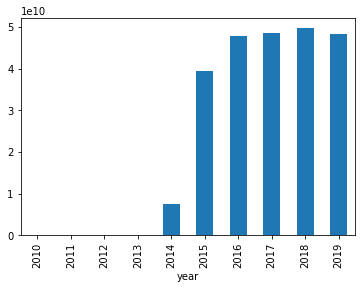

In [20]:
df_filtred_box_office = df.groupby('year')['box_office'].sum()
df_filtred_box_office.plot(x='box_office', y='year', kind='bar');
#df_filtred_box_office.to_frame().style.background_gradient('coolwarm')

Самые высокие сборы показывает 2018 год(может потому что вышли мстители : война бесконечности).

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

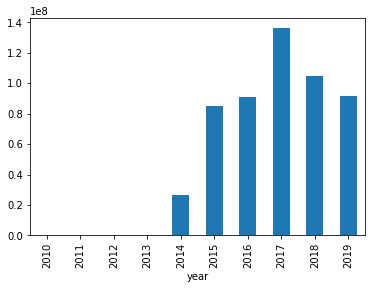

In [21]:
#box_office_year = df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
box_office_year = df.groupby('year')['box_office'].mean()
box_office_year.plot(kind='bar');


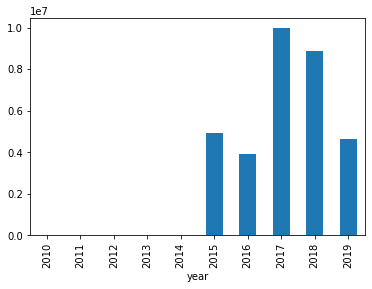

In [22]:
box_office_year_median = df.groupby('year')['box_office'].median()
box_office_year_median.plot(kind='bar');

Самые высокие сборы были в 2017-18 годах, в отрицательном плане отличились 2010 и 2012 года. 

In [23]:
df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median']).round()

,mean,median
,box_office,box_office
year,,
2010,23130.0,1700.0
2011,129383.0,3000.0
2012,54339.0,5660.0
2013,161955.0,3522.0
2014,26684415.0,18160.0
2015,85276804.0,4920933.0
2016,91173271.0,3915041.0
2017,136032793.0,9968340.0


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [24]:
def agg_by_year(data): 
    return (data.groupby('age_restriction')['box_office'] 
     .median() 
     .astype('int64') 
     .to_frame()) 
 
data_filtered_2015_2019 = df.query('box_office > 0 and year >= 2015') 
 
result = agg_by_year(data_filtered_2015_2019) 
columns = ['all years'] 
 
for year in data_filtered_2015_2019['year'].unique(): 
    columns.append(year) 
    result = result.join(agg_by_year(data_filtered_2015_2019.query('year >= @year')), lsuffix=year) 
 
result.columns = columns 
result

,all years,2016,2015,2017,2018,2019
age_restriction,,,,,,
«0+» - для любой зрительской аудитории,2943318,2880098,2943318,3885434,3751185,3885434
«12+» - для детей старше 12 лет,5175580,4732610,5175580,4732610,4378960,3405545
«16+» - для детей старше 16 лет,5667338,5667952,5667338,5956132,5079536,3210717
«18+» - запрещено для детей,6154439,6466949,6154439,6720891,6253034,5603216
«6+» - для детей старше 6 лет,13736207,12525531,13736207,18766750,14458669,12875350


Самые высокие сборы у фильмов категории 6+, скорее всего потому что туда ходят родители с детьми, получается несколько билетов сразу + вы когда нибудь были в кинотеатре в сб-вс утром? там на мультиках всегда залы целиком забиты.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [25]:
df_filtred_support = df.query('refundable_support > 0 or nonrefundable_support > 0')
df_filtred_nosupport = pd.concat([df_filtred_support, df]).drop_duplicates(keep=False).query('firts_country == "Россия"')

In [26]:
df_filtred_support.corr()

,refundable_support,nonrefundable_support,budget,ratings,box_office,year,support
refundable_support,1.000000,0.359622,0.649396,-0.003797,0.312137,0.089616,0.053570
nonrefundable_support,0.359622,1.000000,0.618888,0.125646,0.455729,0.117645,0.104485
budget,0.649396,0.618888,1.000000,0.090791,0.375287,0.163233,-0.253991
ratings,-0.003797,0.125646,0.090791,1.000000,0.143755,0.024965,-0.090163
box_office,0.312137,0.455729,0.375287,0.143755,1.000000,0.119278,-0.070156
year,0.089616,0.117645,0.163233,0.024965,0.119278,1.000000,-0.056099
support,0.053570,0.104485,-0.253991,-0.090163,-0.070156,-0.056099,1.000000


Из корреляции мы видим что особой зависимости между поддержкой, рейтингом ленты и сборами нет.
Совсем слабая корреляция имеется между незовратной поддержкой и сборами, возможно потому что режиссер не боится эксперементировать, когда возвращать деньги не надо.

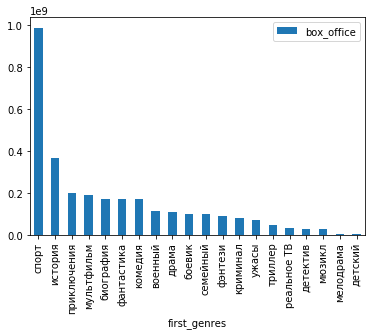

In [27]:
#df_filtred_support.query('first_genres != "-"').pivot_table(index='first_genres', values=['box_office', 'ratings'], aggfunc='mean').sort_values(by='box_office', ascending = False)
df_filtred_support.query('first_genres != "-"').pivot_table(index='first_genres', values=['box_office'], aggfunc='mean').sort_values(by='box_office', ascending = False).plot(kind='bar');

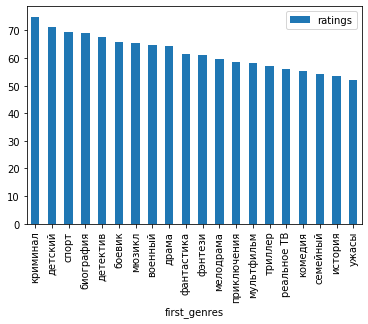

In [28]:
df_filtred_support.query('first_genres != "-"').pivot_table(index='first_genres', values=['ratings'], aggfunc='mean').sort_values(by='ratings', ascending = False).plot(kind='bar');

Видно, что лучше всего в среднем приносят деньги исторические и спортивные фильмы, в то время как мелодрамы и детские фильмы находятся в конце списка.
При этом самые высокие оценки ставят детским фильмам и криминалу, в то же время самые низкие у ужасов и исторических фильмов

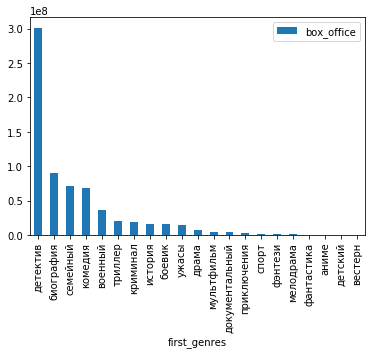

In [29]:
df_filtred_nosupport.query('first_genres != "-"').pivot_table(index='first_genres', values=['box_office'], aggfunc='mean').sort_values(by='box_office', ascending = False).plot(kind='bar');

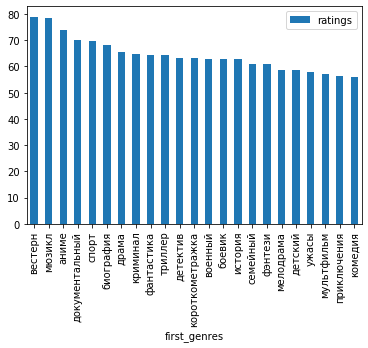

In [30]:
df_filtred_nosupport.query('first_genres != "-"').pivot_table(index='first_genres', values=['ratings'], aggfunc='mean').sort_values(by='ratings', ascending = False).plot(kind='bar');

Среди не финансируемых фильмов наибольшую кассу собирают биографии и детективы, а самые высокие рейтинги у вестернов и мюзиклов

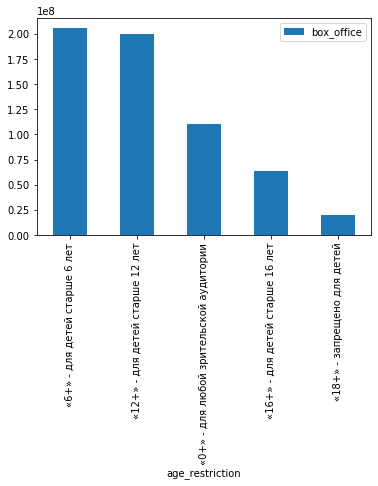

In [31]:
df_filtred_support.pivot_table(index='age_restriction', values=['box_office'], aggfunc='mean').sort_values(by='box_office', ascending = False).plot(kind='bar');

Видно, что у фильмов с гос поддержкой примерно одинаковые сборы , кроме 18+, у них очень маленькие сборы по сравнению с остальными возрастными категориями.

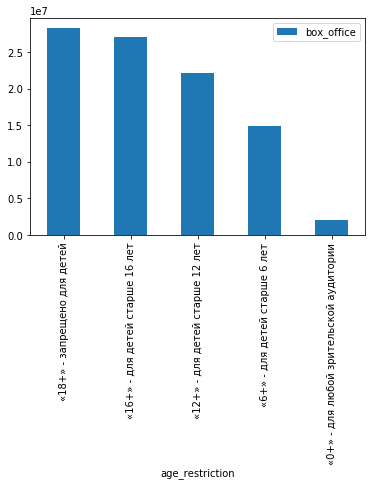

In [32]:
df_filtred_nosupport.pivot_table(index='age_restriction', values=['box_office'], aggfunc='mean').sort_values(by='box_office', ascending = False).plot(kind='bar');

У фильмов без гос поддержки все фильмы собирают примерно одинаковую кассу, в то время как 0+ держится позади

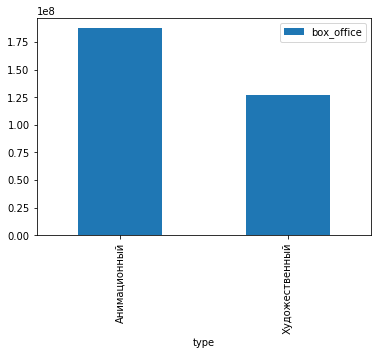

In [33]:
df_filtred_support.pivot_table(index='type', values=['box_office'], aggfunc='mean').sort_values(by='box_office', ascending = False).plot(kind='bar');

В среднем анимационные фильмы приносят немного больше, чем художественные фильмы, среди финансируемых фильмов

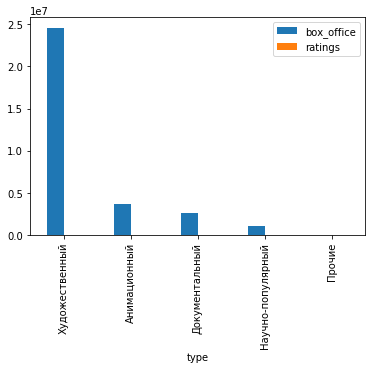

In [34]:
df_filtred_nosupport.pivot_table(index='type', values=['box_office', 'ratings'], aggfunc='mean').sort_values(by='box_office', ascending = False).plot(kind='bar');

у не финансируемых фильмов наибольшие кассы собирают художественные фильмы, остальные, по сравнению с худ.фильмами вообще не собирают кассу.

### Шаг 5. Напишите общий вывод

На основании данных из проведенного исследования можно сказать, что фильмы с гос поддержкой в среднем приносят больше `box_office`, чем фильмы без поддержки, рейтинги у фильмов примерно одинаковые.
Наиболее выгодно финансировать в фильмы: для детей старше 6 лет, спортивные и исторические фильмы, с обратной стороны дестские фильмы и мелодрамы не приносят большую кассу, хоть и имеют хороший рейтинг(детские).